# Lecture 3b: Source code for plots from Lecture 3a + introduction to Seaborn and Plotly libraries

[Data Visualization · 1-DAV-105](https://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

This notebook contains the source code for all the plots shown in the first part of the lecture. In also introduces two new plotting libraries: Seaborn and Plotly.

## Seaborn library

* [Seaborn](https://seaborn.pydata.org/tutorial.html) library is an extension of Matplotlib.
* Seaborn is more convenient for many types of plots; we will use it for more complex scatter plots and line plots, for bar plots, strip plots, histograms and heatmaps. 
* In Seaborn functions, a whole DataFrame can be added using option `data=`. DataFrame column names are then used as `x`, `y`, `hue` (color), `col` (one of subfigures).
* Seaborn creates Matplotlib objects (e.g. figure, axes) which can be then modified using Matplotlib methods.
* The first example of this library is in section [Categorical variable via color](#Categorical-variable-via-color)

## Plotly library for interactive plots

* Another popular library is [Plotly](https://plotly.com/python/plotly-express/).
* It provides some additional plot types and all plots are interactive. 
* For example, in the [scatter plot](https://plotly.com/python/line-and-scatter/), we can find information about each dot by hovering a mouse over it. 
* We can also zoom into parts of the plot by selecting a rectangle. 
* A menu with additional options appears in the top right corner of the plot.
* Plotly is also used the first time in section [Categorical variable via color](#Categorical-variable-via-color).

## Used libraries 


In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing World Bank data

Country indicators from World Bank, https://databank.worldbank.org/home under CC BY 4.0 license.

Country population, surface area in km squared, GDP per capita (current US$), life expectancy at birth (years), fertility rate (births per woman); in years 2000, 2010, 2020. 

In [2]:
url = 'https://bbrejova.github.io/viz/data/World_bank.csv'
countries = pd.read_csv(url).set_index('Country')
display(countries)

,ISO3,Region,Income Group,Population2000,Population2010,Population2020,Area,GDP2000,GDP2010,GDP2020,Expectancy2000,Expectancy2010,Expectancy2020,Fertility2000,Fertility2010,Fertility2020
Country,,,,,,,,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,19542983.0,28189672.0,38972231.0,652860.0,NaN,562.499219,512.055098,55.298000,60.851000,62.575000,7.534,6.099,4.750
Albania,ALB,Europe & Central Asia,Upper middle income,3089026.0,2913021.0,2837849.0,28750.0,1126.683340,4094.349686,5343.037704,75.404000,77.936000,76.989000,2.231,1.656,1.400
Algeria,DZA,Middle East & North Africa,Lower middle income,30774621.0,35856344.0,43451666.0,2381741.0,1780.376063,4495.921476,3354.153164,70.478000,73.808000,74.453000,2.566,2.843,2.942
American Samoa,ASM,East Asia & Pacific,High income,58229.0,54849.0,46189.0,200.0,NaN,10446.863206,15609.777220,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,Europe & Central Asia,High income,66097.0,71519.0,77699.0,470.0,21620.465102,48237.890541,37207.238871,NaN,NaN,NaN,NaN,1.270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands,VIR,Latin America & Caribbean,High income,108642.0,108356.0,106291.0,350.0,NaN,39905.128418,39411.045254,76.619512,77.865854,79.819512,2.060,2.300,2.030
West Bank and Gaza,PSE,Middle East & North Africa,Upper middle income,2922153.0,3786161.0,4803269.0,6020.0,1476.171850,2557.075624,3233.568638,70.388000,73.004000,74.403000,5.443,4.383,3.570
Yemen,YEM,Middle East & North Africa,Low income,18628701.0,24743945.0,32284046.0,527970.0,519.591639,1249.063085,578.512010,62.588000,67.280000,64.650000,6.318,4.855,3.886


## A simple scatterplot

To create a simple scatterplot, commands from the previous lectures suffice. Note that we divide GDP by 1000 and add this information to the axis title. This makes the axis easier to read.

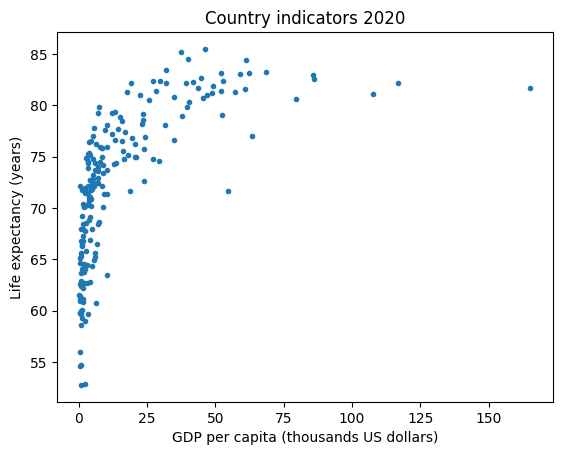

In [3]:
figure, axes = plt.subplots()
axes.plot(countries.GDP2020 / 1000, countries.Expectancy2020, '.')
axes.set_xlabel('GDP per capita (thousands US dollars)')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2020')
pass

## Zooming in

Limits on x axis are set using `set_xlim` method in order to zoom in on countries with lower GDP.

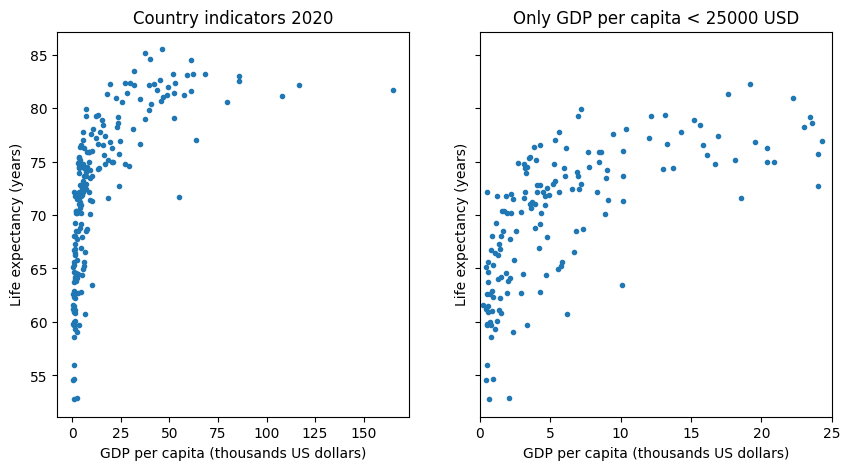

In [4]:
# create two subplots
figure, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# the left subplot - full range of data
axes[0].plot(countries.GDP2020 / 1000, countries.Expectancy2020, '.')
axes[0].set_xlabel('GDP per capita (thousands US dollars)')
axes[0].set_ylabel('Life expectancy (years)')
axes[0].set_title('Country indicators 2020')

# the right subplot - smaller values of GDP
axes[1].plot(countries.GDP2020 / 1000, countries.Expectancy2020, '.')
axes[1].set_xlabel('GDP per capita (thousands US dollars)')
axes[1].set_ylabel('Life expectancy (years)')
axes[1].set_title('Only GDP per capita < 25000 USD')
axes[1].set_xlim(0, 25)
pass

## Log-scale plot

In this plot, the log-scale on the x-axis is switched on by `semilogx` method; similarly there is `semilogy` for the y-axis and `loglog` for both axes.

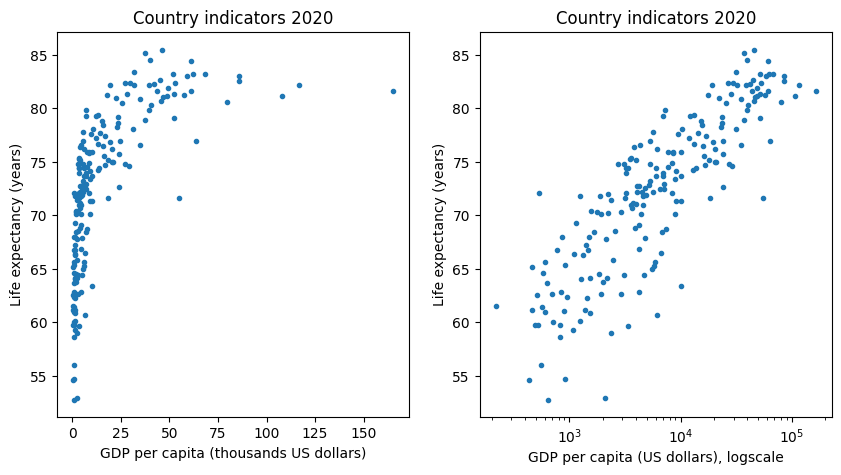

In [5]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

# linear scale plot
axes[0].plot(countries.GDP2020 / 1000, countries.Expectancy2020, '.')
axes[0].set_xlabel('GDP per capita (thousands US dollars)')
axes[0].set_ylabel('Life expectancy (years)')
axes[0].set_title('Country indicators 2020')

# log scale plot
axes[1].plot(countries.GDP2020, countries.Expectancy2020, '.')
axes[1].set_xlabel('GDP per capita (US dollars), logscale')
axes[1].set_ylabel('Life expectancy (years)')
axes[1].set_title('Country indicators 2020')
axes[1].semilogx()
pass

## Categorical variable via color

Here we color countries by their region. Seaborn function [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) can do this easily via `hue` parameter. This function returns Matplotlib axes which can be then modified by familiar methods such as `set_xlabel`. 

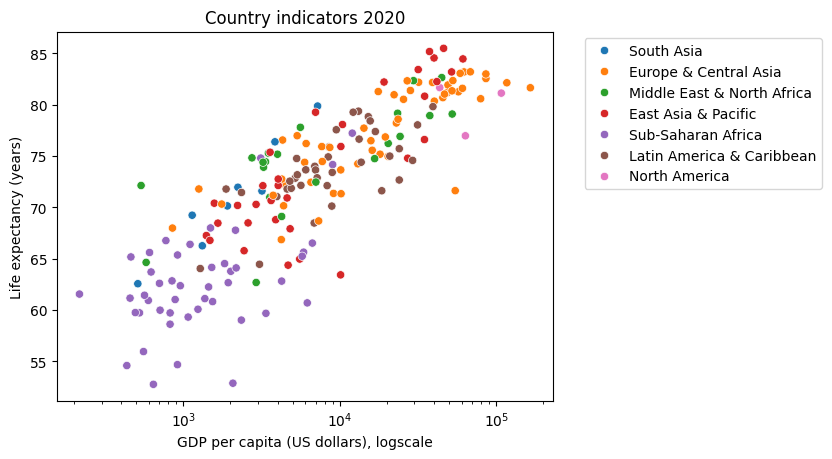

In [6]:
# create plot using Seaborn
axes = sns.scatterplot(data=countries, x='GDP2020', y='Expectancy2020', 
                       hue='Region')
# set plot properties using methods from Matplotlib
axes.set_xlabel('GDP per capita (US dollars), logscale')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2020')
axes.semilogx()
# place legend outside the plot:
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass

* The same plot in Plotly is even easier and interactive. 
* Both Plotly and Seaborn automatically label axes with column names, such as `GDP2020`.
* Here we override such automated labels with longer ones using a dictionary `fig_labels`.

In [7]:
# we want to use index (country name) in the figure for tooltip info
# therefore we create a temporary table with column Country instead of index
temp_table = countries.reset_index()
# how to rename automated axis labels
fig_labels = {'GDP2020':'GDP per capita (US dollars), logscale',
             'Expectancy2020':'Life expectancy (years)'}
# create Plotly plot, add countyr name to tooltip data 
fig = px.scatter(data_frame=temp_table, 
                 x="GDP2020", y="Expectancy2020", color="Region", 
                 hover_data=['Country'], log_x=True,
                 labels = fig_labels)
fig.show()

## Numerical variable via color

Seaborn automatically detects if the column used as `hue` is a categorical or numerical variable. In the previous graph, regions were used as `hue` and Seaborn chose a color palette with a different color for each category. Here we have a numerical variable so a continuous palette with different shades of pink and purple is used by default. We will discuss color palettes later in the course.

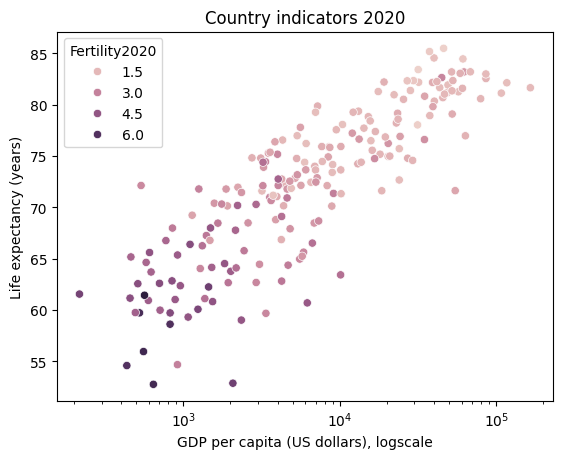

In [8]:
axes = sns.scatterplot(data=countries, x='GDP2020', y='Expectancy2020', 
                       hue='Fertility2020')
axes.set_xlabel('GDP per capita (US dollars), logscale')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2020')
axes.semilogx()
pass

## Numerical variable as point size

We will now use the population of each country as the size of each point (also called bubble), and we will color countries by regions. Sizing points according to the values in a specified table column is again simple to do in Seaborn using paremeter `size` in [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Parameter `sizes` sets the minimum and maximum point size to be used. For simplicity, population in millions is added as a new column to `countries`. 

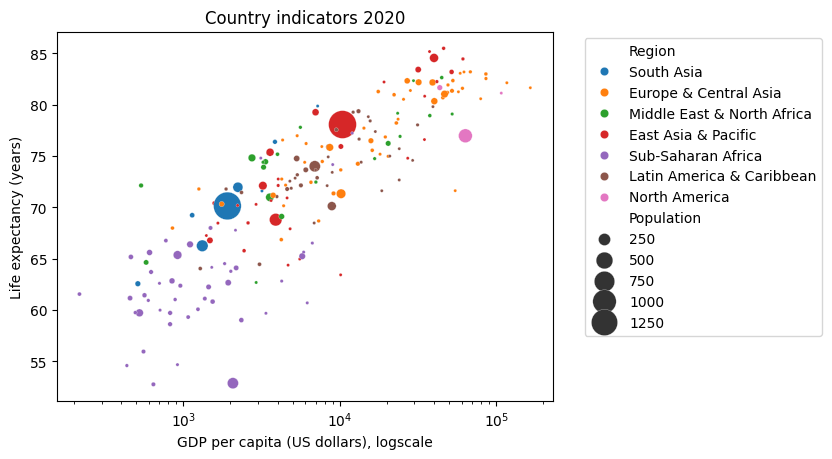

In [9]:
# add a column representing population in millions to table countries
countries['Population'] = countries['Population2020'] / 1e6
# create the plot
axes = sns.scatterplot(data=countries, 
                       x='GDP2020', y='Expectancy2020', hue='Region', size='Population', 
                       sizes=(5, 400))
# set various plot properties
axes.set_xlabel('GDP per capita (US dollars), logscale')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2020')
axes.semilogx()
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass

## Categorical variable as marker type

* We add a new column named `Population change` with categories `increase`, `decrease` and `same` depedning on how the population of a country changed between 2010 and 2020. Category `same` is applied to countries with population change less then 1% in either direction.
* This column is created using `apply` command, which applies a function (here a [lambda expression](https://docs.python.org/3/howto/functional.html#small-functions-and-the-lambda-expression)) to `diff` Series containing relative change in population.
* This column is then used as argument `style` in [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Size of markers is set to 100 (more than default) by argument `s`. Particular markers are selected by `markers` argument.
* Note that in the `scatterplot` we use both columns of `countries` table and separate Series.

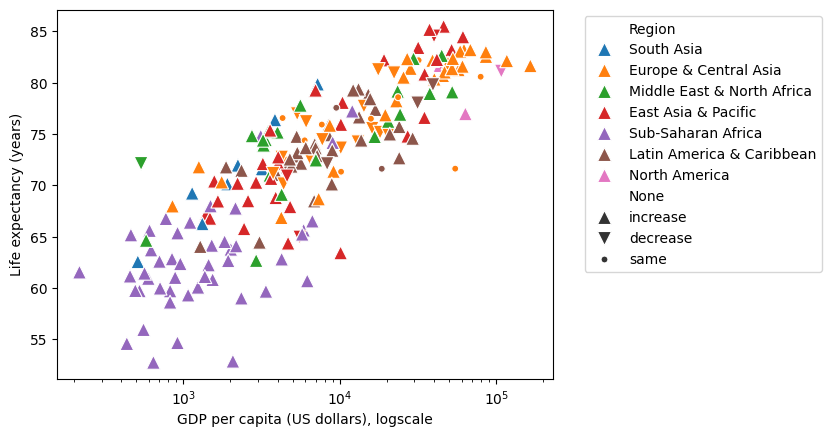

In [10]:
# compute relative differences in population between years 2010 and 2020
diff = (countries.Population2020 - countries.Population2010) / countries.Population2010
# new series with values 'increase', 'decrease' and 'same'
diff_class = diff.apply(lambda x : 'decrease' if x < -0.01 
                        else 'increase' if x > 0.01 else 'same')

# create plot
axes = sns.scatterplot(data=countries, 
                       x='GDP2020', y='Expectancy2020', hue='Region', 
                       style=diff_class, s=100,
                       markers={'increase':'^', 'decrease':'v', 'same':'.'})
# plot settings
axes.semilogx()
axes.set_xlabel('GDP per capita (US dollars), logscale')
axes.set_ylabel('Life expectancy (years)')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass

## Importing Gapminder life expectancy

We import life expectancy data provided free by the [Gapminder foundation](https://www.gapminder.org/data/) under the CC-BY license. The data set gives for each year and each country an estimate of how may years would newborn babies live on average if the trends in mortality of different age groups that were prevailing in the year of their birth would prevail through their entire life. 

In [11]:
url="https://bbrejova.github.io/viz/data/life_expectancy_years.csv"
life_exp = pd.read_csv(url, index_col=0)
life_exp_years = life_exp.iloc[:, 1:]
display(life_exp)

,ISO3,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,29.4,29.5,29.5,29.6,29.7,29.7,29.8,29.9,29.9,...,60.8,61.3,61.2,61.2,61.2,63.4,63.081,63.565,62.575,61.982
Albania,ALB,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.8,77.9,77.9,78.0,78.1,78.2,79.184,79.282,76.989,76.463
Algeria,DZA,30.2,30.3,30.4,31.4,25.4,28.1,29.6,29.5,29.5,...,76.8,76.9,77.0,77.1,77.4,77.7,76.066,76.474,74.453,76.377
Angola,AGO,29.0,29.1,29.2,29.3,29.3,29.4,29.4,29.5,29.6,...,61.3,61.9,62.8,63.3,63.8,64.2,62.144,62.448,62.261,61.643
Antigua and Barbuda,ATG,33.8,33.8,33.8,33.8,33.8,33.8,33.8,33.8,33.8,...,76.7,76.8,76.8,76.9,77.0,77.0,78.511,78.691,78.841,78.497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,32.4,32.4,32.4,32.4,32.4,32.4,32.5,32.5,32.5,...,75.2,75.2,75.0,75.0,75.3,75.3,71.979,72.161,71.095,70.554
Vietnam,VNM,31.2,31.1,31.1,31.1,31.1,31.0,31.0,31.0,30.9,...,73.8,74.0,74.1,74.3,74.4,74.5,73.976,74.093,75.378,73.618
Yemen,YEM,23.5,23.5,23.5,23.5,23.5,23.6,23.6,23.6,23.6,...,68.3,68.9,69.0,68.6,68.1,68.1,64.575,65.092,64.650,63.753


## A simple line graph

Here we use `plot` from matplotlib to plot life expectancy over the years for Slovakia. Years are column names which need to be converted from string to integer using Python list comprehension.

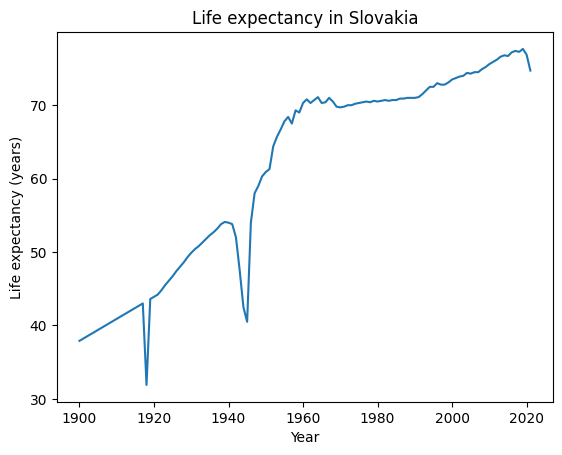

In [12]:
# list of numerical years from column names
years = [int(x) for x in life_exp_years.columns]
# simple plot for one row of the table
figure, axes = plt.subplots()
axes.plot(years, life_exp_years.loc['Slovak Republic'])
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in Slovakia')
pass

## A line graph with multiple lines

Here we plot two lines, each by a separate call to `plot`. Each line has a label to show in the legend.

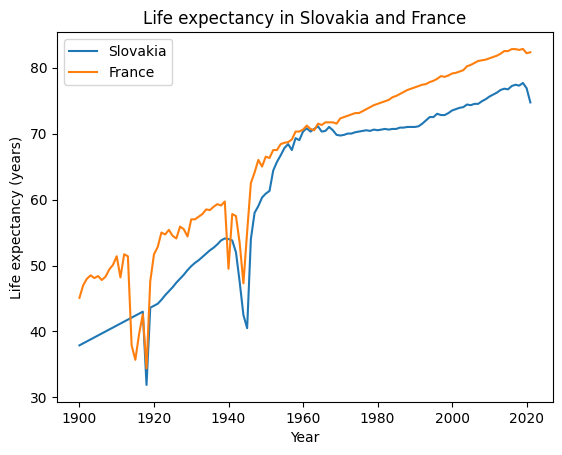

In [13]:
figure, axes = plt.subplots()
# plot two lines
axes.plot(years, life_exp_years.loc['Slovak Republic'], label='Slovakia')
axes.plot(years, life_exp_years.loc['France'], label='France')
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in Slovakia and France')
axes.legend()
pass

## Area graph

Here we fill in the area between x-axis (value 0) and a table row using [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method. France is plotted on top and is set to be semi-transparent using `alpha=0.5`.

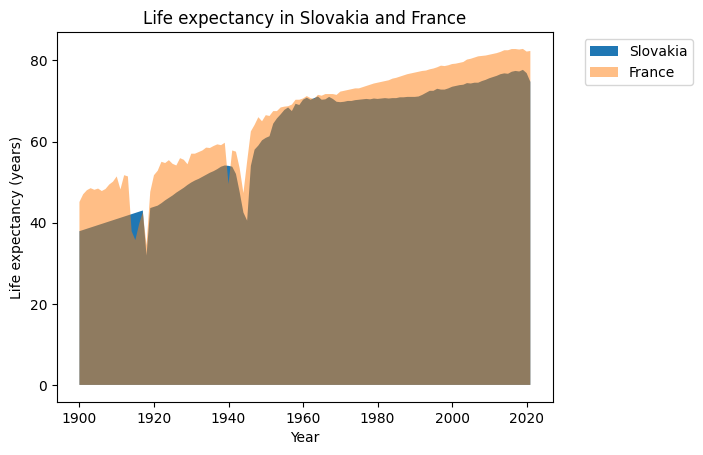

In [14]:
figure, axes = plt.subplots()
# two filled areas, the second is semi-transparent
axes.fill_between(years, 0, life_exp_years.loc['Slovak Republic'], label='Slovakia')
axes.fill_between(years, 0, life_exp_years.loc['France'], label='France', alpha=0.5)
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in Slovakia and France')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass

## Line graph with many lines

* Here we want to plot lines for all countries alphabetically between Si and Sz and having at least million inhabitants.
* First we select such countries from `countries` to  table `selection`. 
* Using `intersection`, we get only countries from our selection that are also in Gapminder table (`life_exp`).
* Part of the Gapminder table for these coutnries is then stored as `life_exp_sel`.

In [15]:
selection = countries.query('Population2020 > 1e6 and Country >= "Si" and Country <= "Sz"')
life_exp_iso3 = life_exp.reset_index().set_index('ISO3')
life_exp_sel = life_exp_iso3.loc[life_exp_iso3.index.intersection(selection.ISO3), :].set_index('Country')
display(life_exp_sel)


,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Sierra Leone,27.4,27.5,27.5,27.6,27.7,27.8,27.9,27.9,28.0,28.1,...,56.9,57.9,57.1,58.5,59.8,60.4,59.796000,60.255000,59.763000,60.062000
Singapore,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,...,83.6,83.9,84.2,84.4,84.7,84.8,83.297561,83.595122,84.465854,83.441463
Slovak Republic,37.9,38.2,38.5,38.8,39.1,39.4,39.7,40.0,40.3,40.6,...,76.2,76.6,76.8,76.7,77.2,77.4,77.265854,77.665854,76.865854,74.714634
Slovenia,36.4,36.4,36.4,36.4,36.4,36.4,36.4,36.4,36.4,36.4,...,79.9,80.2,80.9,80.8,81.0,81.1,81.378049,81.529268,80.531707,80.875610
Somalia,31.2,31.2,31.3,31.4,31.4,31.5,31.5,31.6,31.7,31.7,...,56.8,57.4,57.9,58.3,58.5,58.5,56.375000,57.078000,55.967000,55.280000
South Africa,34.5,34.5,34.5,34.6,34.6,34.6,34.6,34.7,34.7,34.8,...,59.5,61.1,62.5,63.4,64.4,66.3,65.674000,66.175000,65.252000,62.341000
South Sudan,29.6,29.6,29.8,29.8,29.9,30.0,30.1,30.2,30.3,30.4,...,58.2,58.0,58.3,59.4,59.4,59.3,55.950000,55.912000,55.480000,54.975000
Spain,34.7,35.6,36.4,37.2,38.0,38.9,39.7,40.5,41.4,41.0,...,82.3,82.6,82.7,82.6,82.9,83.1,83.431707,83.831707,82.331707,83.178049
Sri Lanka,32.5,32.5,32.5,33.9,34.7,32.4,26.9,30.0,30.4,29.8,...,76.1,76.4,76.5,76.9,77.2,77.5,75.748000,76.008000,76.393000,76.399000


* In Matplotlib, each country from `life_exp_sel` is plotted separately in a for-loop, similarly as for two countries above.
* Note that colors repeat because the default palette is not large enough.

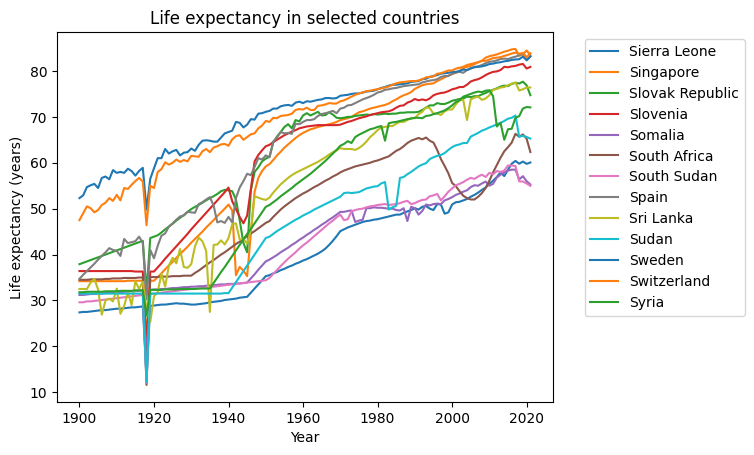

In [16]:
figure, axes = plt.subplots()
# loop over countries
for country in life_exp_sel.index:
    axes.plot(years, life_exp_sel.loc[country], label=country)
    
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in selected countries')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass

* To use Seaborn for the same plot, it is better to change `life_exp_sel` table from wide to long format using  `melt` method. Year is converted from strings to integers.
* This creates a table with columns Country, Year, Expectancy.

In [17]:
life_exp_sel_long = (
    life_exp_sel.reset_index()
    .melt(id_vars=['Country'])
    .rename(columns={'variable':'Year', 'value':'Expectancy'})
    .astype({'Year':'int32'})
  )
display(life_exp_sel_long)

,Country,Year,Expectancy
0,Sierra Leone,1900,27.400000
1,Singapore,1900,34.200000
2,Slovak Republic,1900,37.900000
3,Slovenia,1900,36.400000
4,Somalia,1900,31.200000
...,...,...,...
1581,Sri Lanka,2021,76.399000
1582,Sudan,2021,65.267000
1583,Sweden,2021,83.156098
1584,Switzerland,2021,83.851220


* Now we use Seaborn function [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html), setting parameters `x`, `y` and `hue` to column names in our long table and specifying that we want lineplit using `kind="line"`. 
* The function returns `FacetGrid`, which potentially contains multiple axes, so we ned to use slightly different methods to set labels.
* Seaborn created a sufficiently large color palette but some colors are then hard to distinguish.

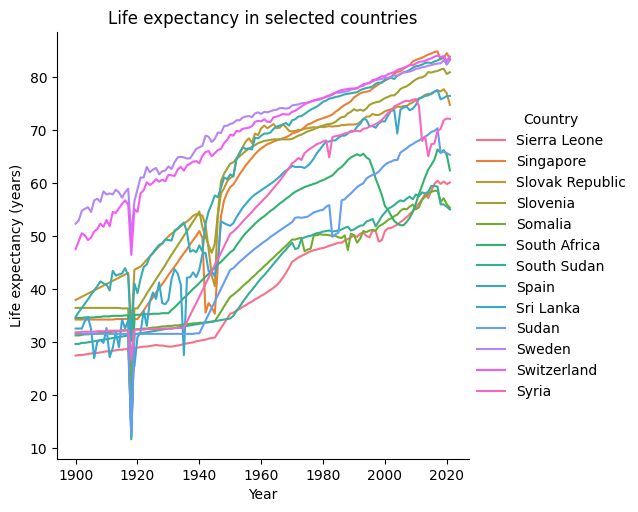

In [18]:
grid = sns.relplot(data=life_exp_sel_long, x='Year', y='Expectancy', 
                   hue='Country', kind="line")
grid.set_axis_labels('Year', 'Life expectancy (years)')
grid.set(title='Life expectancy in selected countries')
pass

## Small multiples

* Small multiples, with each country in our selection as a separate plot, is very easy to do in Seaborn from a long-format table using `relplot`, using column `Country` in option `col` which selects one of subplots for each data point.
* Option `col_wrap` selects how many subplots will be placed ion one row of the overall figure.

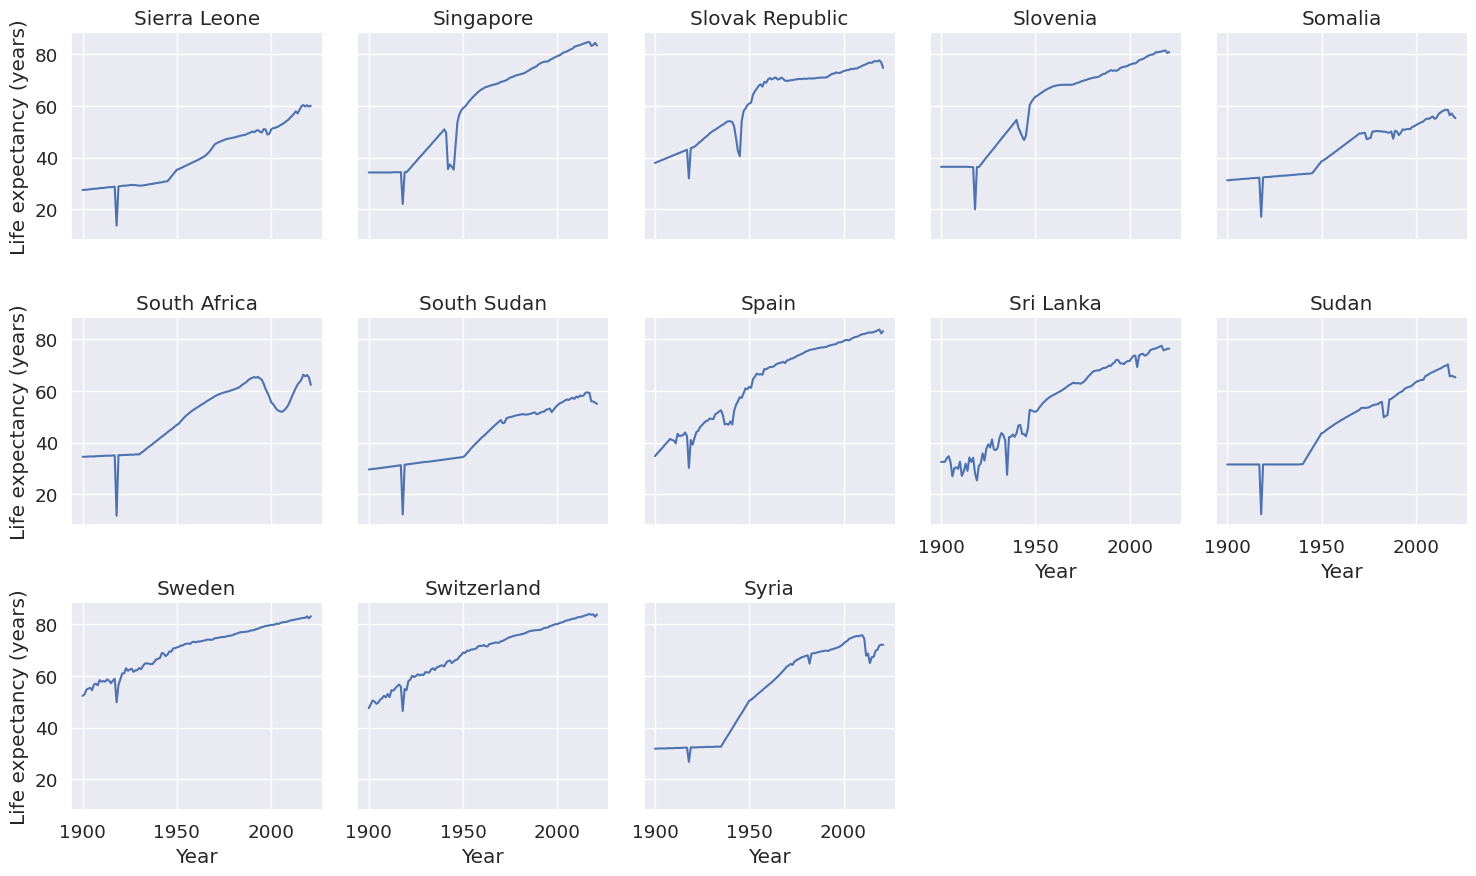

In [19]:
# create grid of small multiple plots
sns.set_theme(font_scale=1.2)
grid = sns.relplot(data=life_exp_sel_long, 
                   x='Year', y='Expectancy', col='Country', 
                   col_wrap=5, kind="line", height=3, aspect=1)

grid.set_axis_labels('Year', 'Life expectancy (years)')
grid.set_titles("{col_name}")  # title of each plot will be country name
pass

## Bar graph

* We plot a bargraph of life expectancy in our selected countries by Seaborn function [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).
* All bars are plotted by the same color using setting `color="C0"`.
* We rotate tick labels on the x axes to fit them in the given space.

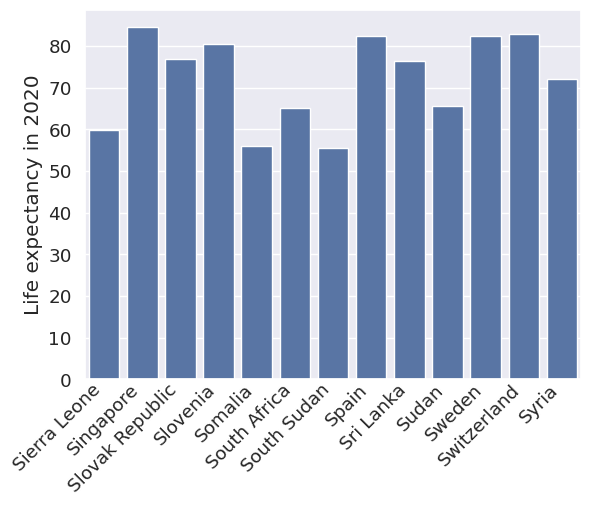

In [20]:
def rotate_bar_labels(axes, angle=45):
    """Auxiliary function for rotating bar plot labels by 45 degrees"""
    axes.tick_params(axis='x', labelrotation=angle, pad=-5)
    plt.setp(axes.get_xticklabels(), ha='right') 


# select one year from the long table
life_exp_sel_2020 = life_exp_sel_long.query('Year==2020')
# create barplot
axes = sns.barplot(data=life_exp_sel_2020, 
                   x='Country', y='Expectancy', color="C0")
axes.set_ylabel("Life expectancy in 2020")
axes.set_xlabel(None)
rotate_bar_labels(axes)
pass

## Bar graph with sorted columns

Countries are sorted by value in preprocessing, then plotted as before.

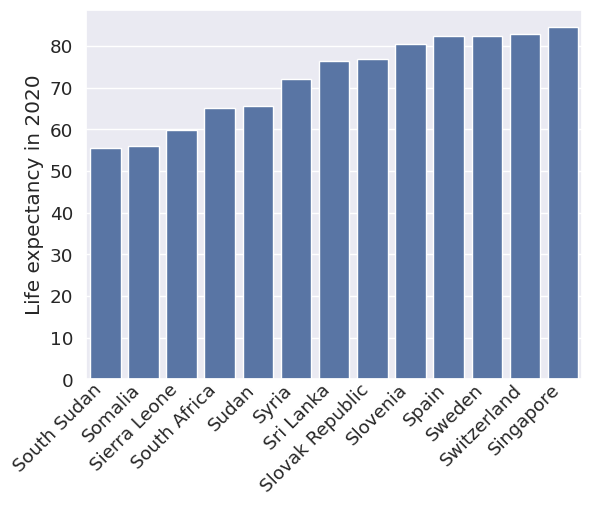

In [21]:
# sorting
life_exp_sel_2020_sorted = life_exp_sel_2020.sort_values('Expectancy')
# plotting
axes = sns.barplot(data=life_exp_sel_2020_sorted, 
                   x='Country', y='Expectancy', color="C0")
axes.set_ylabel("Life expectancy in 2020")
axes.set_xlabel(None)
rotate_bar_labels(axes)
pass

## Bar graph with multiple colors

* Now we compare life expectancy in two years in a bargraph with tho colors of columns. 
* After selecting appropriate rows of the long table, we use column `Year` in the `hue` parameter of `barplot`.

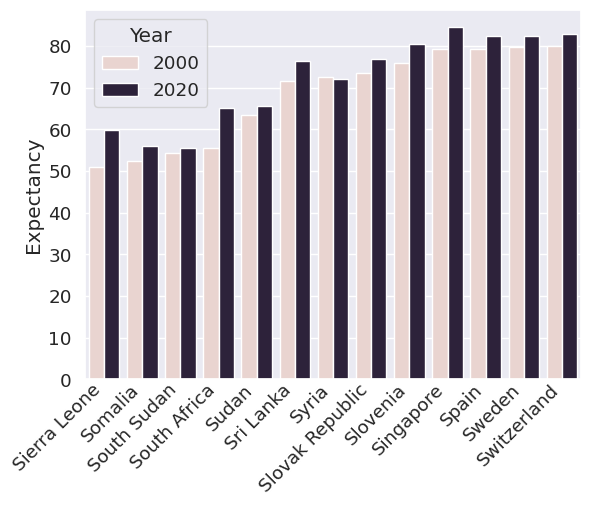

In [22]:
# select only years 2000 and 2020 from the table, sort
life_exp_sel_comp = life_exp_sel_long.query('Year==2020 or Year==2000').sort_values('Expectancy')
# plotting
axes = sns.barplot(data=life_exp_sel_comp, x='Country', y='Expectancy', hue='Year')
axes.set_xlabel(None)
rotate_bar_labels(axes)
pass

## Horizontal bar graph

* Longer bar labels are easier to read in a horizontal barplot.
* In Seaborn, it is sufficent to switch `x` and `y` arguments. 

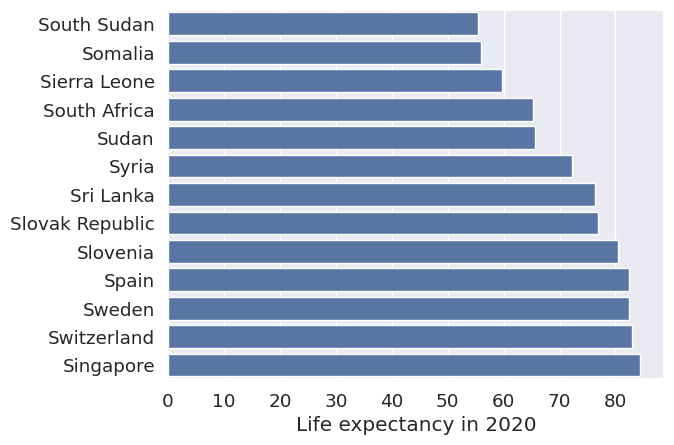

In [23]:
axes = sns.barplot(data=life_exp_sel_2020_sorted, 
                   y='Country', x='Expectancy', color="C0")
axes.set_xlabel("Life expectancy in 2020")
axes.set_ylabel(None)
pass

## Dot plot


* Dot plot shows only the end of each bar as a dot.
* Seaborn's [pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html) joins these dots by lines by default, `linestyle='none'` prevents this.
* Note that in contrast to barplots, the x axis does not start at 0 (we could make it so by `set_xlim`).

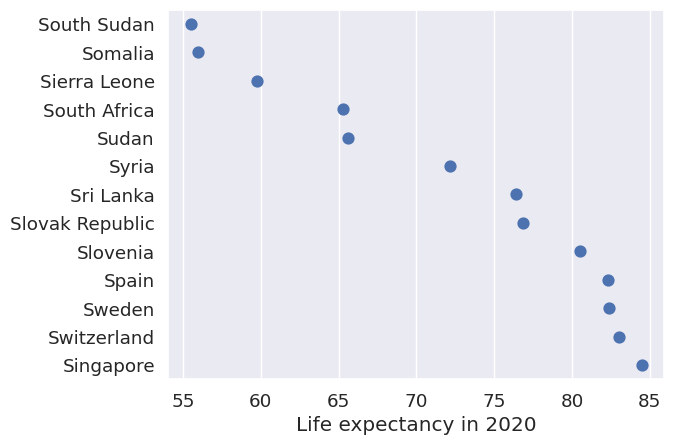

In [24]:
axes = sns.pointplot(data=life_exp_sel_2020_sorted, 
                     y='Country', x='Expectancy', 
                     color="C0", linestyle='none')
axes.set_xlabel("Life expectancy in 2020")
axes.set_ylabel(None)
pass

## Heatmap

* The goal is to create heatmap with countries as rows, several years as columns and life expectancy values as colors. 
* We first need to create a DataFrame with these values in such an arrangment by selecting rows with appropriate years from our long table and pivoting the table by year to make it wide.
* Finally we sort the table by the expectancy in the last year.

In [25]:
# set of years to be used
sel_years={2000, 2005, 2010, 2015, 2020}
# create desired wide table
life_exp_sel_wide = (life_exp_sel_long.query('Year in @sel_years')
                     .pivot(index='Country', columns='Year', values='Expectancy')
                     .sort_values(2020, ascending=False))
# show the table
display(life_exp_sel_wide)


Year,2000,2005,2010,2015,2020
Country,,,,,
Singapore,79.3,81.1,83.2,84.4,84.465854
Switzerland,80.1,81.5,82.5,83.5,83.000000
Sweden,79.8,80.6,81.5,82.2,82.356098
Spain,79.4,80.5,82.0,82.6,82.331707
Slovenia,76.0,77.7,79.5,80.8,80.531707
Slovak Republic,73.5,74.3,75.6,76.7,76.865854
Sri Lanka,71.6,73.8,74.7,76.9,76.393000
Syria,72.5,75.0,75.8,67.3,72.140000
Sudan,63.4,65.7,67.7,69.6,65.614000


* Heatmap is plotted by [`sns.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.
* We have used options to set the shape of individual cells to square and change the color palette ('cmap').

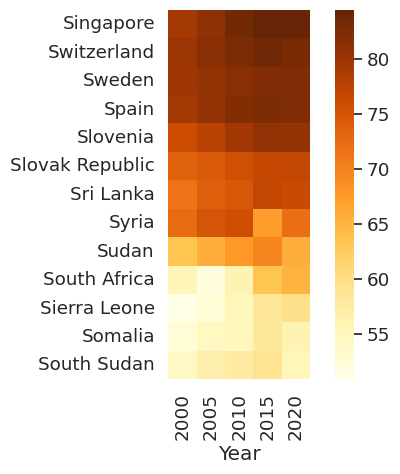

In [26]:
axes = sns.heatmap(data=life_exp_sel_wide, square=True, cmap="YlOrBr")
axes.set_ylabel(None)
pass

## Pie chart

* To prepare data for pie chart, we use two features of Pandas which we will cover in a later lecture: converting the Income Group column to a categorical type and computing the number of countries in various income groups using `groupby`. 
* In this way we create two Series: `groups` with counts for the whole world and `groups_asia` for just East Asian countries.

In [27]:
# creating a categorical type
income_categories = ["Low income", "Lower middle income",
                     "Upper middle income", "High income"]
cat_type = pd.api.types.CategoricalDtype(categories=income_categories,
                                         ordered=True)
# converting Income Group column to cat_type
countries_cat = countries.astype({'Income Group': cat_type})
# aggregation using groupby
groups = countries_cat.groupby('Income Group').size().rename('Count')
# the same but only on countries selected by query
groups_asia = (countries_cat.query('Region=="East Asia & Pacific"')
               .groupby('Income Group').size().rename('Count'))

display(groups)

Income Group
Low income             26
Lower middle income    54
Upper middle income    54
High income            82
Name: Count, dtype: int64

* The plotting is done by the [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) function from Matplotlib.
* It gets the series with counts as parameter `x` and country names as `labels`.

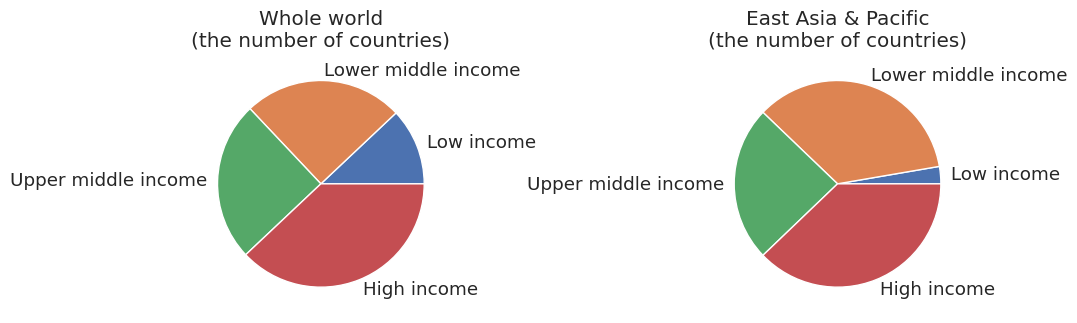

In [28]:
figure, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].pie(x=groups, labels=groups.index)
axes[0].set_title('Whole world\n(the number of countries)')
axes[1].pie(x=groups_asia, labels=groups_asia.index)
axes[1].set_title('East Asia & Pacific\n(the number of countries)')
figure.subplots_adjust(wspace=1)
pass

## Pie chart with labels

* Labels are added by `autopct` setting in [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html). This setting provides a [formatting string](https://docs.python.org/3/tutorial/inputoutput.html#old-string-formatting) for the values, here we print one decimal place.

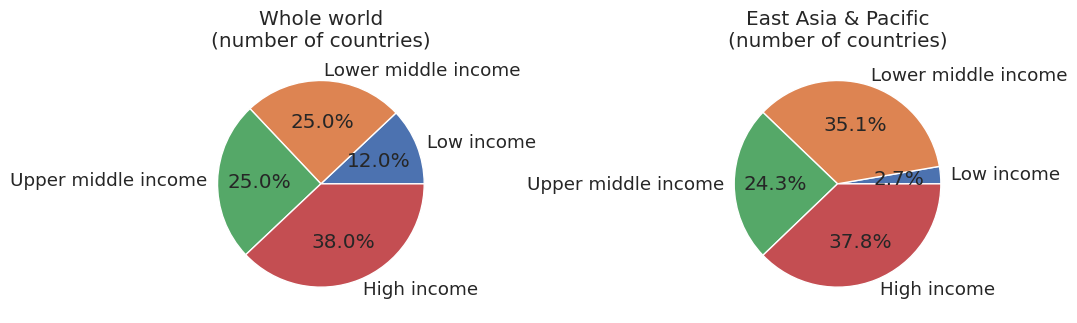

In [29]:
figure, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].pie(x=groups, labels=groups.index, autopct="%.1f%%")
axes[0].set_title('Whole world\n(number of countries)')
axes[1].pie(x=groups_asia, labels=groups_asia.index, autopct="%.1f%%")
axes[1].set_title('East Asia & Pacific\n(number of countries)')
figure.subplots_adjust(wspace=1)
pass

## Stacked bar graph instead of pie chart

* To prepare data for stacked bar graph, we need to combine our two count Series (`groups` and `groups_asia`) to one long table `groups_concat`.
* This is a DataFrame, because `Income Group` was moved from index to a column. 
* We also add percentage column, which will be used in the plot. Percentage is computed by divided counts with the sum of all counts.
* We also add a column with region name, because we will consider two regions (East Asia and the whole world).

In [30]:
# first create DataFrame for East Asia
# add Income Group index as a column 
temp_asia = groups_asia.reset_index()
# compute percentages and add as a new column
temp_asia['Percentage'] = temp_asia['Count'] * 100 / temp_asia['Count'].sum()
# add Region as a new column, filled with copies of the same string
temp_asia['Region'] = ["East Asia & Pacific"] * len(groups_asia)

# the same three steps for World
temp_world = groups.reset_index()
temp_world['Percentage'] = temp_world['Count'] * 100 / temp_world['Count'].sum()
temp_world['Region'] = ["World"] * len(groups)

# concatenate two DataFrames and display
groups_concat = pd.concat([temp_asia, temp_world], axis=0)
display(groups_concat)

,Income Group,Count,Percentage,Region
0,Low income,1,2.702703,East Asia & Pacific
1,Lower middle income,13,35.135135,East Asia & Pacific
2,Upper middle income,9,24.324324,East Asia & Pacific
3,High income,14,37.837838,East Asia & Pacific
0,Low income,26,12.037037,World
1,Lower middle income,54,25.000000,World
2,Upper middle income,54,25.000000,World
3,High income,82,37.962963,World


* Stacked bar graph is not very automated in Matplotib. 
* Left coordinate for each rectangle needs to be computed manually, then function [`barh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html#matplotlib.axes.Axes.barh) is used (see also [tutorial](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html)).
* Each bar is labeled with the percentage using [`bar_label`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label) function.

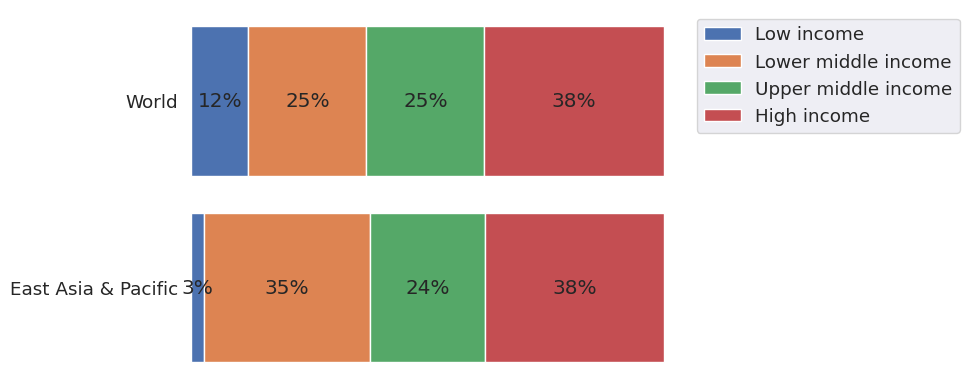

In [31]:
# list of regions and income groups
tmp_regions = groups_concat['Region'].unique()
tmp_groups = groups_concat['Income Group'].unique()
# the first rectangles start at 0
starts = pd.Series([0] * tmp_regions.shape[0])
# create plot
figure, axes = plt.subplots()

# iterate through income groups
for group in tmp_groups:  
    # select data for this income group from both regions
    tmp_data = groups_concat.query("`Income Group` == @group")
    # plot
    rectangles = axes.barh(y=tmp_data['Region'], width=tmp_data['Percentage'], left=starts, label=group)
    # add labels
    axes.bar_label(rectangles, label_type='center', fmt="%.0f%%")
    # move starts by the size of each rectangle
    starts += tmp_data['Percentage'].reset_index(drop=True)  

axes.legend(bbox_to_anchor=(1, 1), loc=2)
# hide plot frame and x-axis ticks
axes.xaxis.set_visible(False)
axes.set_frame_on(False)
pass

* Stacked bar charts are much easier in Plotly using [`px.bar`](https://plotly.com/python-api-reference/generated/plotly.express.bar) function.

In [32]:
fig = px.bar(groups_concat, x="Region", y="Percentage", color="Income Group", 
             text="Percentage", text_auto=".0f")
fig.update_layout(font=dict(size=20), xaxis_title=None,)
fig.show()

It can also be drawn easily directly by Pandas, but values (sizes of rectangles) are not shown. The table is first converted toa wide form with different income groups as columns.

Income Group,Low income,Lower middle income,Upper middle income,High income
Region,,,,
East Asia & Pacific,2.702703,35.135135,24.324324,37.837838
World,12.037037,25.000000,25.000000,37.962963


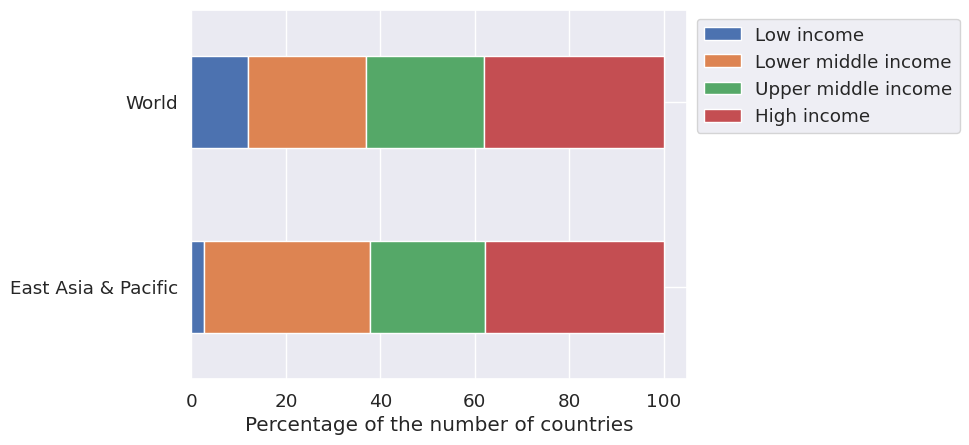

In [33]:
groups_concat_wide = groups_concat.pivot(columns='Income Group', index='Region', values='Percentage')
display(groups_concat_wide)
axes = groups_concat_wide.plot(kind='barh', stacked=True)
axes.legend(bbox_to_anchor=(1, 1), loc=2)
axes.set_ylabel(None)
axes.set_xlabel('Percentage of the number of countries')
pass

## Colored bar graphs insteads of pie chart

* As we have seen before, colored bar graphs are easy in Seaborn from a long table.
* Therefore we use `groups_concat` DataFrame.

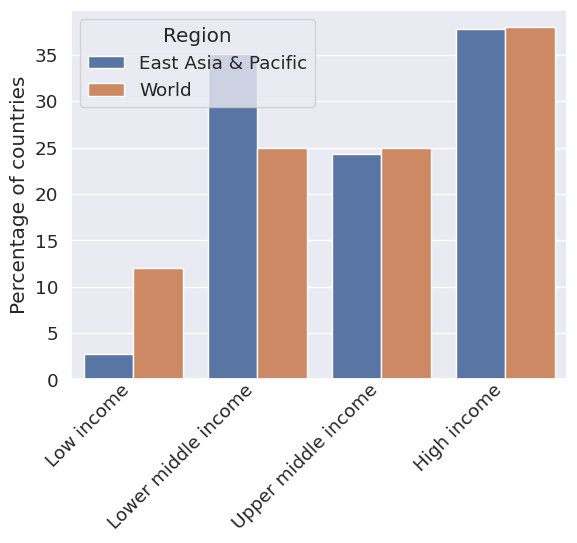

In [34]:
axes = sns.barplot(data=groups_concat, 
                   x='Income Group', y='Percentage', hue='Region')
rotate_bar_labels(axes)
axes.set_xlabel(None)
axes.set_ylabel("Percentage of countries")
pass

## Multiple bar graphs instead of pie chart

* In the next plot a separte bar graph for each region.
* This is also very simple in Seaborn using [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) with setting `col='Region'` and `kind='bar'`.
* Labels are rotated in each subplot using a for-loop.

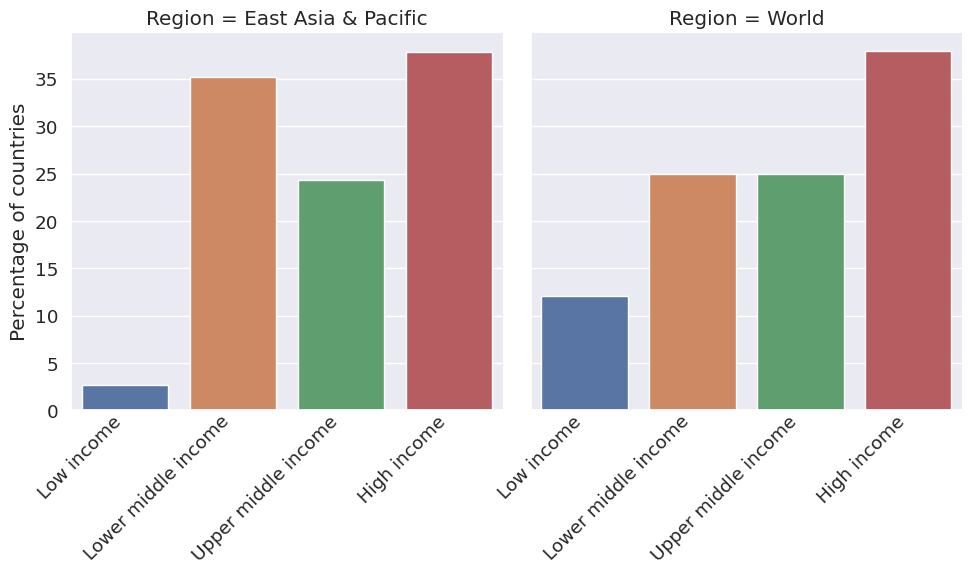

In [35]:
grid = sns.catplot(kind='bar', data=groups_concat, 
                   x='Income Group', y='Percentage', 
                   col='Region', hue='Income Group')

# label rotation
for which in [0,1]:
  rotate_bar_labels(grid.axes[0,which])
  grid.axes[0,which].set_xlabel(None)
  grid.axes[0,which].set_ylabel("Percentage of countries")
pass

## Strip plot

* Strip plot of fertility per region is also very simple in [`sns.catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html).
* Setting `kind='strip'` is default for `catplot`, so it is omitted here.
* Size of dots is reduced to limit overlapping markers.

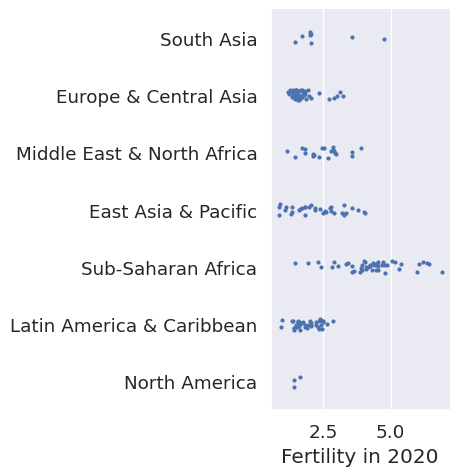

In [36]:
grid = sns.catplot(x="Fertility2020", y="Region", data=countries, size=3)
grid.set_axis_labels("Fertility in 2020", "")
pass

## Histogram


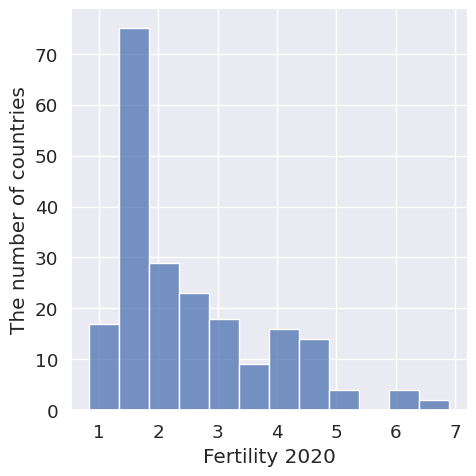

In [37]:
grid = sns.displot(countries, x="Fertility2020", binwidth=0.5)
grid.set_axis_labels("Fertility 2020", "The number of countries")
pass

## Parallel coordinates

* We want to display varipus properties of individual countries as parallel coordinate plot.
* We first create table `for_parallel` with selected columns and express all numbers as percentage of the maximum value. 
* We add `selected` column which has True in row for Slovakia and False elsewhere. This is used to highlight Slovakia in the plot. 
* Also ordering is changed to draw Slovakia the last.

In [38]:
# selecting columns
for_parallel_sel = countries.loc[:, ['Population2020', 'Area', 'GDP2020', 
                                     'Expectancy2020', 'Fertility2020']]
# computing maximum in each column
for_parallel_max = for_parallel_sel.max(axis=0)
# dividing values by the maximum and multiplying by 100 to get percentage
for_parallel = for_parallel_sel.div(for_parallel_max, axis=1) * 100
# creating column of booleans called 'selected' which highlights Slovakia with True
for_parallel['selected'] = countries.index=="Slovak Republic"
# sort by 'selected' to put Slovakia last
for_parallel.sort_values('selected', inplace=True)
# show end of the table
display(for_parallel.tail())

,Population2020,Area,GDP2020,Expectancy2020,Fertility2020,selected
Country,,,,,,
Greece,0.758174,0.771775,9.651333,95.076168,20.168311,False
Greenland,0.003995,2.400538,29.962671,83.788155,29.294835,False
Fiji,0.065227,0.106853,2.638193,79.445541,36.201393,False
Zimbabwe,1.110458,2.285380,0.752009,71.492098,51.436448,False
Slovak Republic,0.386849,0.286754,10.711280,89.904148,23.070226,True


* Parallel coordinates are drawn using Pandas [`parallel_coordinates`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html) function, which internally calls Matplotlib and returns Axes object.

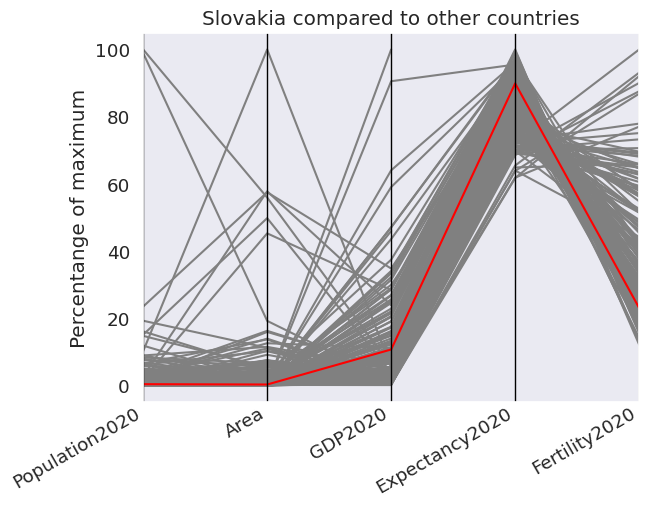

In [39]:
axes = pd.plotting.parallel_coordinates(for_parallel, class_column='selected', 
                                        color=['gray', 'red'])
axes.get_legend().remove()
axes.set_ylabel("Percentange of maximum")
axes.set_title("Slovakia compared to other countries")
rotate_bar_labels(axes, angle=30)
pass

## Parallel categories

* We will use two categorical columns from the countries table, but more categorical columns could be easily added.
* We use the version of the table with a categorical income groups and sort countries by income. 
* Now we use [`parallel-categories`](https://plotly.com/python/parallel-categories-diagram/) function from Plotly.
* This function orders each column of the figure by size. By calling `update_traces`, we reorder the first column by the same order as they first occur in our table.

In [40]:
for_parallel_cat = (countries_cat.loc[:,['Income Group','Region']]
                     .sort_values('Income Group', ascending=False))
fig = px.parallel_categories(for_parallel_cat, width=800)
fig.update_traces(dimensions=[{"categoryorder": "array"}, {}])
fig.update_layout(font_size=20)
fig.update_layout(margin={'l':200,'r':200})
fig.show()

## Radar chart

* Radar charts are not well supported in any of the used libraries.
* Below we compute angles of each axis manually, then use `plot` from Matplotlib.
* When creating axes, we specify polar coordinates `subplot_kw={'projection': 'polar'}`. 
* We also use [`set_thetagrids`](https://matplotlib.org/stable/api/projections/polar.html#matplotlib.projections.polar.PolarAxes.set_thetagrids)

,Population2020,Area,GDP2020,Expectancy2020,Fertility2020
Country,,,,,
India,98.957347,19.225710,1.048125,82.049124,29.759141
China,100.000000,55.929174,5.702240,91.320734,18.586767
United States,23.493127,57.500095,34.803081,90.038227,23.817470


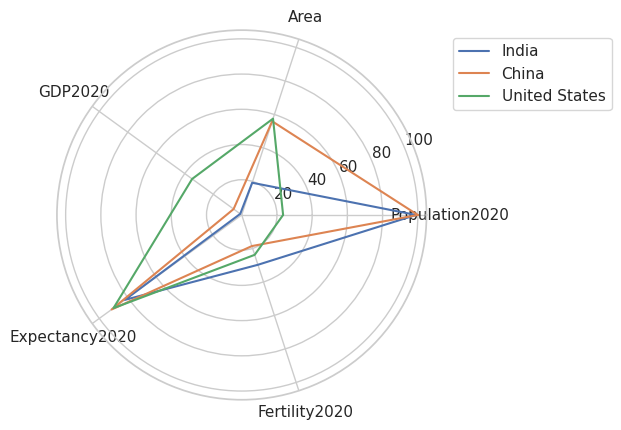

In [41]:
# skip 'selected' column, use only 3 countries
for_radar = for_parallel.loc[['India','China','United States'], :].iloc[:, 0:-1]  
display(for_radar.head())

# setup plot with polar coordinates
sns.set_theme(style="whitegrid")
figure, axes = plt.subplots(subplot_kw={'projection': 'polar'})
categories = list(for_radar.columns)
import math
angles = [ i * 2 * math.pi / len(categories) for i in range(len(categories))]
angles_deg = [x / math.pi * 180 for x in angles]    
axes.set_thetagrids(angles_deg, labels=categories)

# for plotting, we will need to return to starting point in each line
angles.append(angles[0])

# for each country create list of values, add the starting point, plot
for country in for_radar.index:
    values = list(for_radar.loc[country, :])
    values.append(values[0])
    axes.plot(angles, values, label=country)

axes.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass